In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Đọc dữ liệu
df = pd.read_csv("weather.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181960 entries, 0 to 181959
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   province  181960 non-null  object 
 1   max       181960 non-null  int64  
 2   min       181960 non-null  int64  
 3   wind      181960 non-null  int64  
 4   wind_d    181960 non-null  object 
 5   rain      181960 non-null  float64
 6   humidi    181960 non-null  int64  
 7   cloud     181960 non-null  int64  
 8   pressure  181960 non-null  int64  
 9   date      181960 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 13.9+ MB


In [2]:
df.describe()

,max,min,wind,rain,humidi,cloud,pressure
count,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000
mean,29.837277,23.277874,11.038657,6.567130,77.083068,41.721268,1010.229127
std,4.571345,3.945381,5.311807,13.602055,9.288553,23.875067,4.635714
min,4.000000,2.000000,1.000000,0.000000,23.000000,0.000000,988.000000
25%,28.000000,21.000000,7.000000,0.100000,71.000000,23.000000,1008.000000
50%,31.000000,24.000000,10.000000,1.800000,78.000000,38.000000,1010.000000
75%,33.000000,26.000000,14.000000,7.500000,83.000000,58.000000,1012.000000
max,46.000000,32.000000,54.000000,596.400000,100.000000,100.000000,1038.000000


In [3]:
df.isnull().sum()

province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
dtype: int64

In [4]:
so_mau = df.shape[0]
so_thuoc = df.shape[1]
cot_so = df.select_dtypes(include=['number']).columns.tolist()
cot_text = df.select_dtypes(include=['object', 'string']).columns.tolist()

print("Số mẫu:", so_mau)
print("Số thuộc tính:", so_thuoc)
print("Cột số:", cot_so)
print("Cột text:", cot_text)

Số mẫu: 181960
Số thuộc tính: 10
Cột số: ['max', 'min', 'wind', 'rain', 'humidi', 'cloud', 'pressure']
Cột text: ['province', 'wind_d', 'date']


In [5]:
# Trích xuất và tạo các đặc trưng mới
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [6]:
#  Tạo đặc trưng vùng
bac = [
    'Ha Noi', 'Bac Ninh', 'Bac Giang', 'Hai Duong', 'Hung Yen', 'Ha Nam', 'Nam Dinh', 'Ninh Binh', 'Thai Binh', 'Vinh Phuc',
    'Quang Ninh', 'Lao Cai', 'Yen Bai', 'Lai Chau', 'Dien Bien', 'Son La', 'Hoa Binh', 'Ha Giang', 'Tuyen Quang',
    'Cao Bang', 'Bac Kan', 'Lang Son', 'Phu Tho', 'Thai Nguyen'
]
trung = [
    'Thanh Hoa', 'Nghe An', 'Ha Tinh', 'Quang Binh', 'Quang Tri', 'Thua Thien Hue',
    'Da Nang', 'Quang Nam', 'Quang Ngai', 'Binh Dinh', 'Phu Yen', 'Khanh Hoa',
    'Ninh Thuan', 'Binh Thuan', 'Kon Tum', 'Gia Lai', 'Dak Lak', 'Dak Nong', 'Lam Dong'
]

nam = [
    'TP Ho Chi Minh', 'Binh Duong', 'Binh Phuoc', 'Tay Ninh', 'Dong Nai', 'Ba Ria - Vung Tau',
    'Long An', 'Tien Giang', 'Ben Tre', 'Tra Vinh', 'Vinh Long', 'Dong Thap',
    'An Giang', 'Hau Giang', 'Can Tho', 'Kien Giang', 'Soc Trang', 'Bac Lieu', 'Ca Mau'
]

def map_region(province):
    if province in bac:
        return 'bac'
    elif province in trung:
        return 'trung'
    elif province in nam:
        return 'nam'
    else:
        return 'unknown'
df['region'] = df['province'].apply(map_region)

In [7]:
# Tạo đặc trưng mùa
def month_to_season(month):
    # Mùa mưa: tháng 5-11, mùa khô: tháng 12-4 (có thể điều chỉnh theo vùng)
    if month in [5, 6, 7, 8, 9, 10, 11]:
        return 'mua_mua'
    else:
        return 'mua_kho'
    
df['season'] = df['date'].dt.month.apply(month_to_season)

In [8]:
# Sắp xếp dữ liệu theo tỉnh và ngày
df = df.sort_values(['province', 'date'])
# Tạo rain_: Lượng mưa các ngày trước
df['rain_1'] = df.groupby('province')['rain'].shift(1)
df['rain_2'] = df.groupby('province')['rain'].shift(2)
df['rain_3'] = df.groupby('province')['rain'].shift(3)
df['rain_7'] = df.groupby('province')['rain'].shift(7)
# Tạo đặc trưng rain_mean: trung bình mưa các ngày gần nhất 
df['rain_mean_3d'] = df.groupby('province')['rain'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
df['rain_mean_7d'] = df.groupby('province')['rain'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
df['rain_mean_10d'] = df.groupby('province')['rain'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
df['rain_mean_14d'] = df.groupby('province')['rain'].transform(lambda x: x.rolling(window=14, min_periods=1).mean())
# Tính nhiệt độ trung bình, nhiệt độ chênh lệch
df["avg_temp"] = (df["max"] + df["min"]) / 2
df['temp_range'] = df['max'] - df['min']

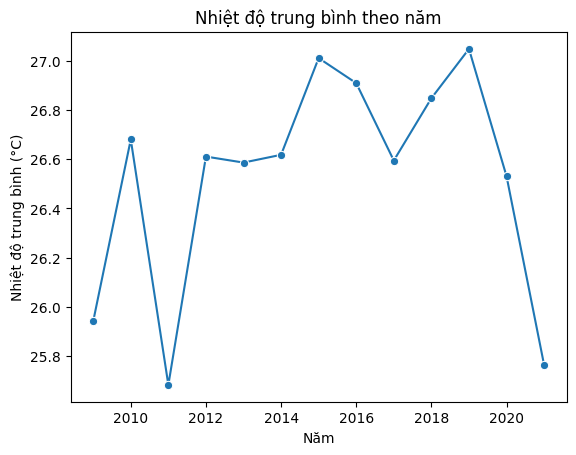

In [9]:
# Biểu đồ 1: Nhiệt độ trung bình theo năm
plt.figure()
avg_temp_by_year = df.groupby("year")["avg_temp"].mean().reset_index()
sns.lineplot(data=avg_temp_by_year, x="year", y="avg_temp", marker="o")
plt.title("Nhiệt độ trung bình theo năm")
plt.xlabel("Năm")
plt.ylabel("Nhiệt độ trung bình (°C)")
plt.show()

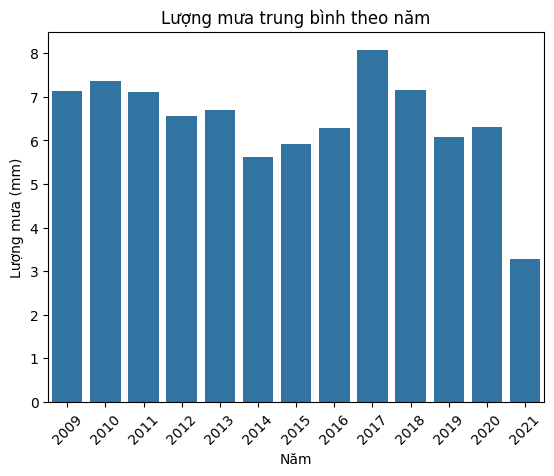

In [10]:
# Biểu đồ 2: Lượng mưa theo năm
plt.figure()
rain_by_year = df.groupby("year")["rain"].mean().reset_index()
sns.barplot(data=rain_by_year, x="year", y="rain")
plt.title("Lượng mưa trung bình theo năm")
plt.xlabel("Năm")
plt.ylabel("Lượng mưa (mm)")
plt.xticks(rotation=45)
plt.show()

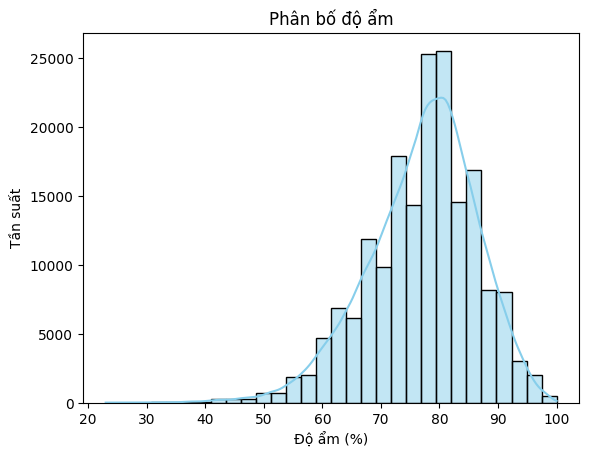

In [11]:
# Biểu đồ 3: Histogram độ ẩm
plt.figure()
sns.histplot(df["humidi"], bins=30, kde=True, color="skyblue")
plt.title("Phân bố độ ẩm")
plt.xlabel("Độ ẩm (%)")
plt.ylabel("Tần suất")
plt.show()

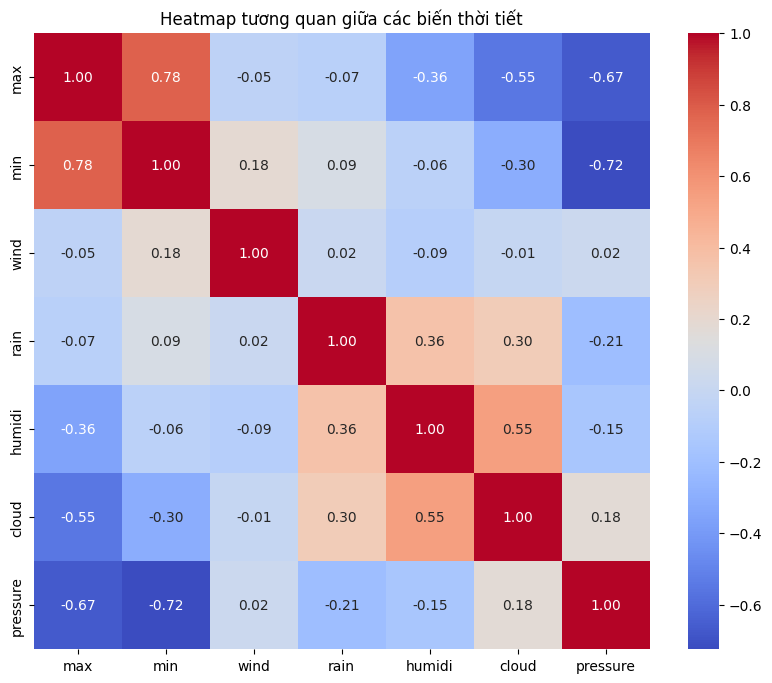

In [12]:
# Biểu đồ 4: Heatmap tương quan
plt.figure(figsize=(10, 8))
corr = df[["max", "min", "wind", "rain", "humidi", "cloud", "pressure"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Heatmap tương quan giữa các biến thời tiết")
plt.show()

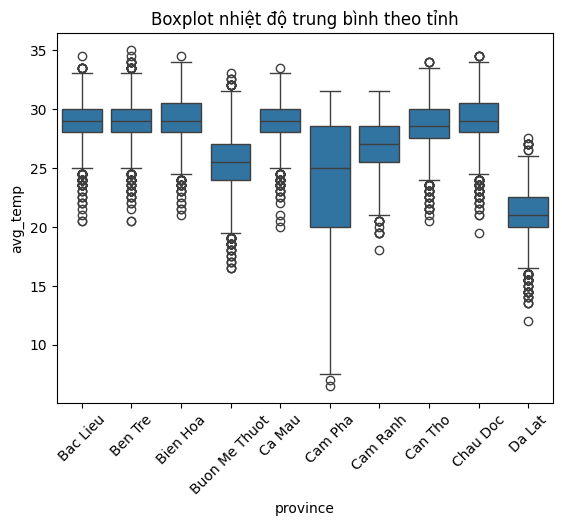

In [13]:
# Biểu đồ 5: Boxplot theo tỉnh
plt.figure()
top10 = df["province"].value_counts().head(10).index
sns.boxplot(data=df[df["province"].isin(top10)], x="province", y="avg_temp")
plt.title("Boxplot nhiệt độ trung bình theo tỉnh")
plt.xticks(rotation=45)
plt.show()

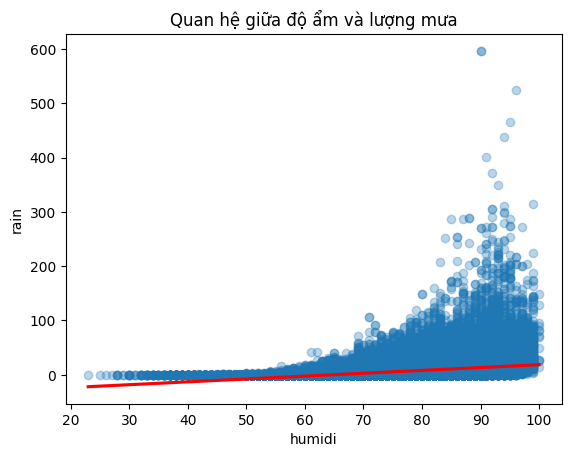

In [14]:
# Biểu đồ 6: Regplot độ ẩm vs mưa
plt.figure()
sns.regplot(data=df, x="humidi", y="rain", scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Quan hệ giữa độ ẩm và lượng mưa")

# Hiển thị tất cả biểu đồ cùng lúc
plt.show()

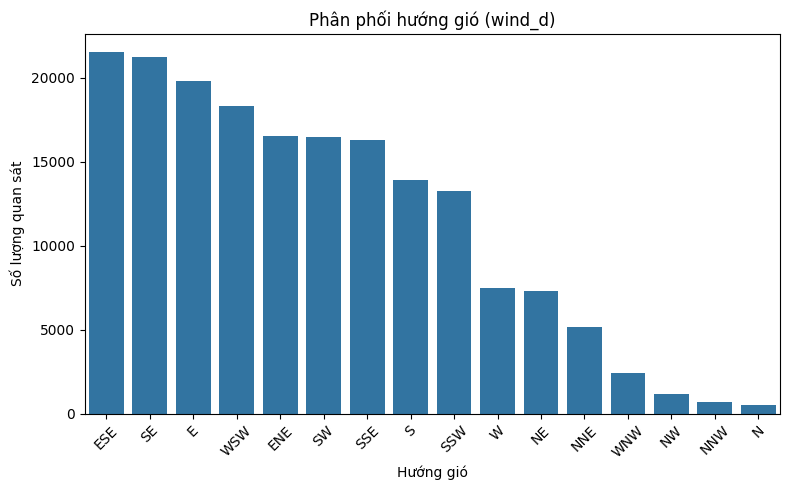

In [15]:
# Biểu đồ 7: Phân phối hướng gió (wind_d)
plt.figure(figsize=(8,5))
if 'wind_d' in df.columns:
    sns.countplot(data=df, x='wind_d', order=df['wind_d'].value_counts().index)
    plt.title('Phân phối hướng gió (wind_d)')
    plt.xlabel('Hướng gió')
    plt.ylabel('Số lượng quan sát')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding 
df['province'] = LabelEncoder().fit_transform(df['province'])
df['season'] = LabelEncoder().fit_transform(df['season'])
df['wind_d'] = LabelEncoder().fit_transform(df['wind_d'])
df['region'] = LabelEncoder().fit_transform(df['region'])

# Loại bỏ các dòng có NaN 
df = df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181680 entries, 26 to 161372
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   province       181680 non-null  int64         
 1   max            181680 non-null  int64         
 2   min            181680 non-null  int64         
 3   wind           181680 non-null  int64         
 4   wind_d         181680 non-null  int64         
 5   rain           181680 non-null  float64       
 6   humidi         181680 non-null  int64         
 7   cloud          181680 non-null  int64         
 8   pressure       181680 non-null  int64         
 9   date           181680 non-null  datetime64[ns]
 10  year           181680 non-null  int32         
 11  month          181680 non-null  int32         
 12  day            181680 non-null  int32         
 13  region         181680 non-null  int64         
 14  season         181680 non-null  int64         
 15  rain

In [18]:
# Thiết lập cấu hình cho biểu đồ
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

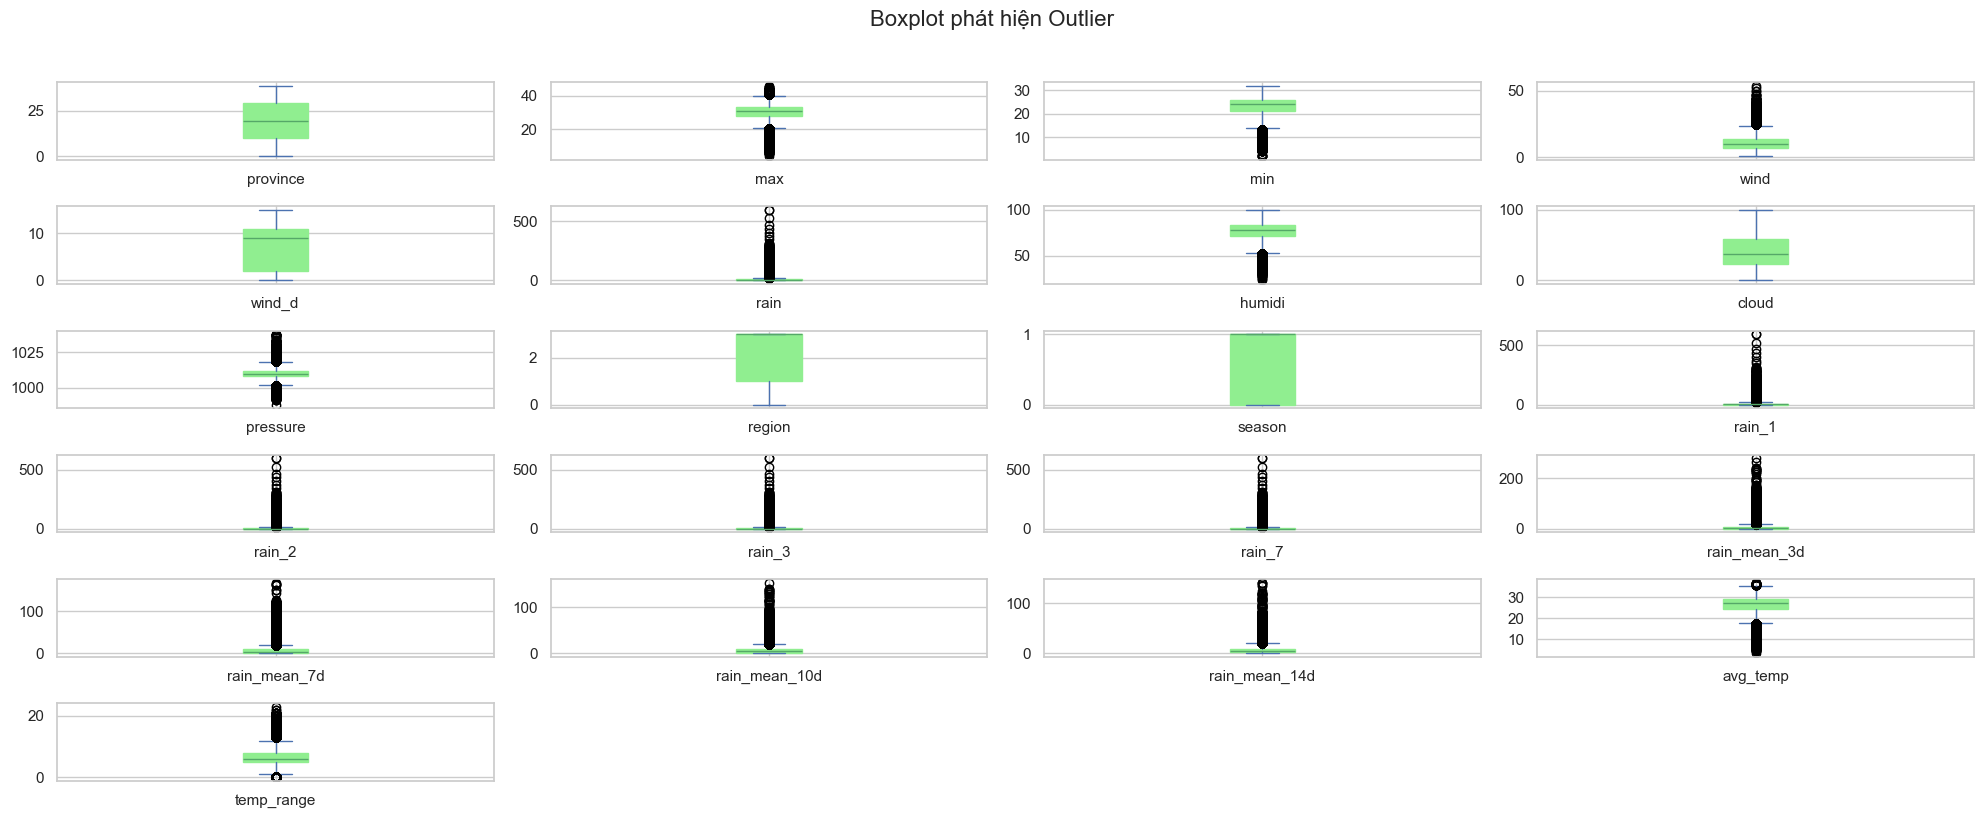

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].plot(kind='box', subplots=True, layout=(-1, 4), figsize=(20, 8), patch_artist=True, color=dict(boxes='lightgreen'))
plt.suptitle("Boxplot phát hiện Outlier", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [22]:
# Loại bỏ outlier
import numpy as np
def clean_data(df):
    cols_to_clean = ['max', 'min', 'wind', 'humidi', 'cloud']
    df_clean = df.copy()
    
    for col in cols_to_clean:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

    # Log-transform mục tiêu
    df_clean['rain_log'] = np.log1p(df_clean['rain'])
    
    return df_clean
df_clean = clean_data(df)

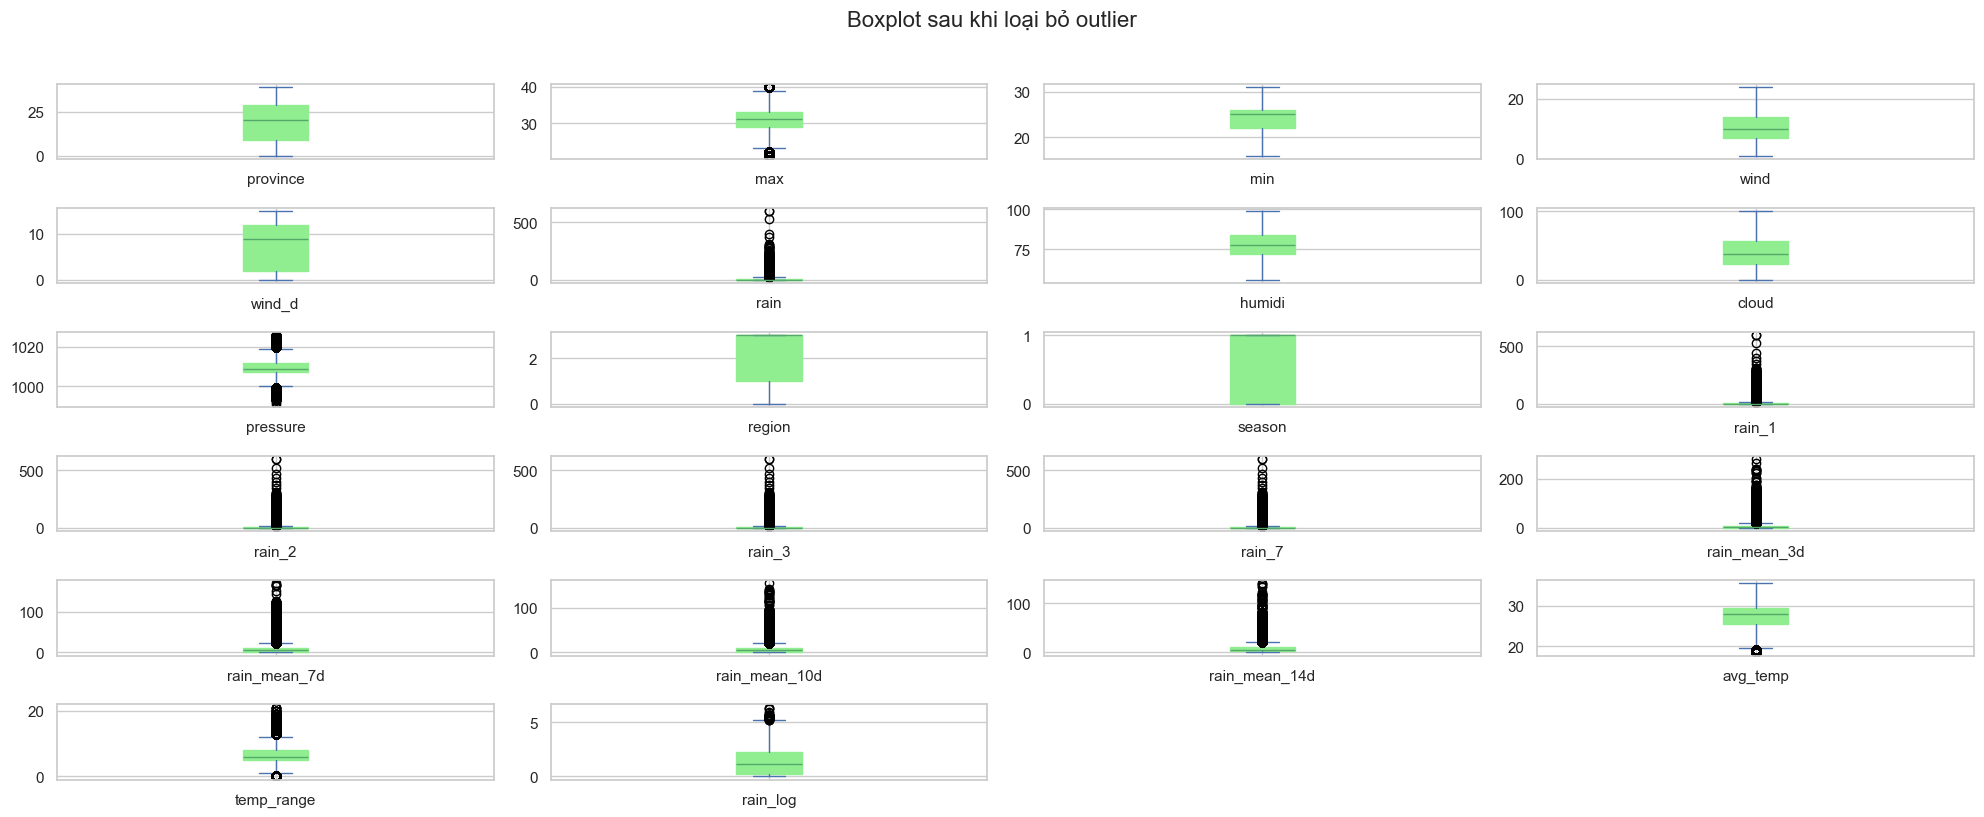

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

df_clean[numeric_cols].plot(kind='box', subplots=True, layout=(-1, 4), figsize=(20, 8), patch_artist=True, color=dict(boxes='lightgreen'))
plt.suptitle("Boxplot sau khi loại bỏ outlier", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
df_clean.to_csv("weather_cleaned.csv", index=False)